# 数组
N维数组是机器学习和神经网络的主要数据结构<br />
n维数组在torch和tensorflow称为‘张量(tensor)’; 在numpy里是ndarray<br />
张量表示一个由数值组成的数组，这个数组可能有多个维度<br />
张量中的每个值都称为张量的元素（element）<br />
新的张量将存储在内存中，并采用基于CPU的计算<br />

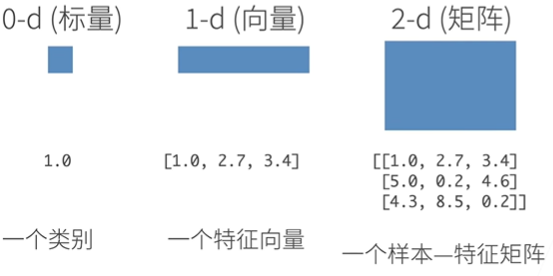<br />
0维（0-d）的数组称为‘标量’<br />
1维（1-d）的数组称为‘向量’<br />
2维（2-d）的数组称为‘矩阵’<br />

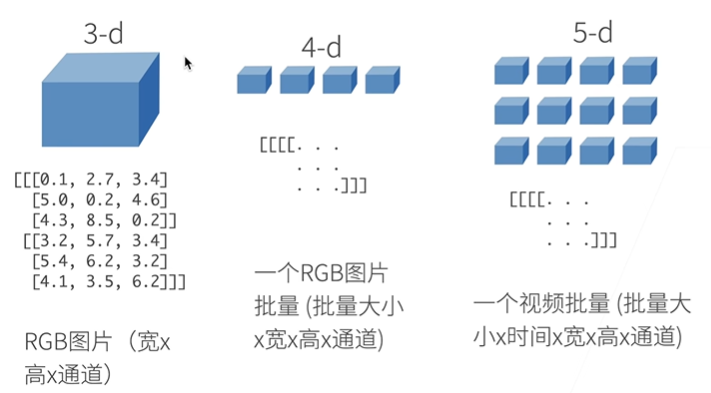<br />
3维（3-d）的数组称为‘RGB图片’【宽*高*通道】    (宽就是列的个数,高就是行的个数,通道就是RGB)  <br /> 
4维（4-d）的数组称为‘一个RGB图片批量’【批量大小*宽*高*通道】 <br />
5维（5-d）的数组称为‘一个视频批量’【批量大小*时间*宽度*高*通道】 <br /> 

# 数据操作
虽然在日常叫法是‘PyTorch’,但是导入的时候应该是torch非pytorch

In [1]:
import torch

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

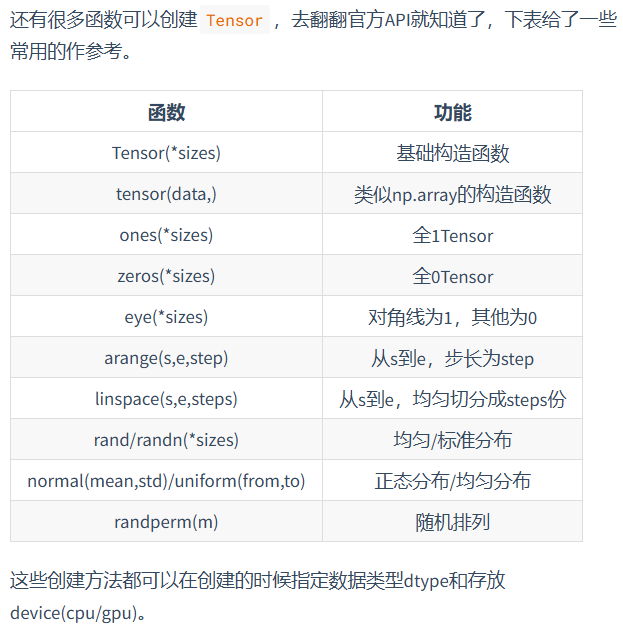

In [3]:
#可以通过张量的shape属性来访问张量的形状和元素的综述
x.shape

torch.Size([12])

In [4]:
#可以通过numel()函数来访问张量中元素的总数
x.numel()

12

In [5]:
#不改变元素数量和元素值的情况下进行张量的形状改变
x = x.reshape(3, 4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [28]:
A = torch.arange(24).reshape(2,3,4) # 三行四列 2个切片
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

## 常见的标准算数运算符, 视为按元素运算

In [7]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x + y, x - y, x * y, x / y, x ** y   # **是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [10]:
torch.cat((x, y), dim=0) #一维数值只能横向拼接,因为维度是1,即只能dim=0

tensor([1., 2., 4., 8., 2., 2., 2., 2.])

In [15]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])
torch.cat((x, y), dim=1) #当维度扩充后,就可以做纵向拼接或横向拼接

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

In [17]:
x.sum() #对张量中的所有元素进行求和,返回的是一个标量值

tensor(10)

## 广播机制 Broadcast Mechanism
当两个不同形状的张量在进行元素运算时,可能会触发广播机制. 【前提是维度一样,否则报错】

In [21]:
a = torch.arange(3).reshape((3,1)) #三行一列
b = torch.arange(2).reshape((1,2)) #一行二列
a, b, a + b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

这里是怎么实现元素运算的呢?

#先适当复制元素使这两个Tensor形状相同后再按元素运算<br />
#即两个张量先进行元素复制,然后再进行元素操作<br />
#元素复制后的结果<br />

    [[0,0],
     [1,1],
     [2,2]]

    [[0,1],
     [0,1],
     [0,1]]

## torch和numpy互转

In [23]:
A = x.numpy() # torch → numpy
B = torch.tensor(A) # numpy → torch
type(A), type(B)

(numpy.ndarray, torch.Tensor)

# 线性代数
https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/geometry-linear-algebraic-ops.html

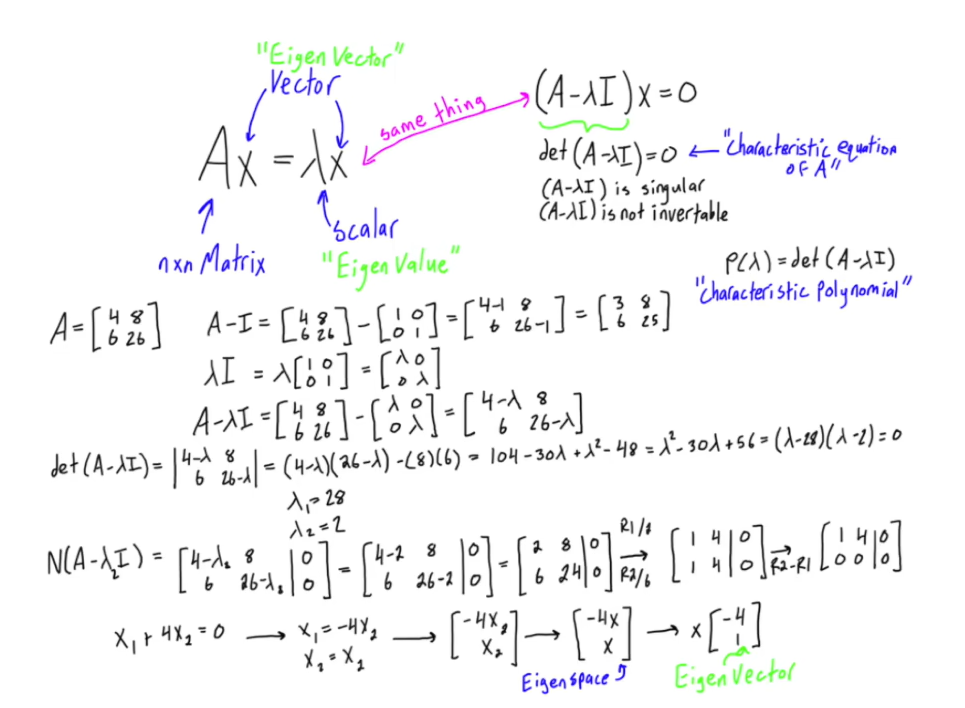
特征向量：不被矩阵改变方向的向量

## 标量

数学表示法中,标量由普通小写字母表示（例如，$x$、$y$和$z$）<br />
用$\mathbb{R}$表示所有（连续）*实数*标量的空间<br />
表达式$x\in\mathbb{R}$是表示$x$是一个实值标量的正式形式<br />
符号$\in$称为“属于”，它表示“是集合中的成员”<br />
例如$x, y \in \{0,1\}$可以用来表明$x$和$y$是值只能为$0$或$1$的数字<br />
(**标量由只有一个元素的张量表示**)



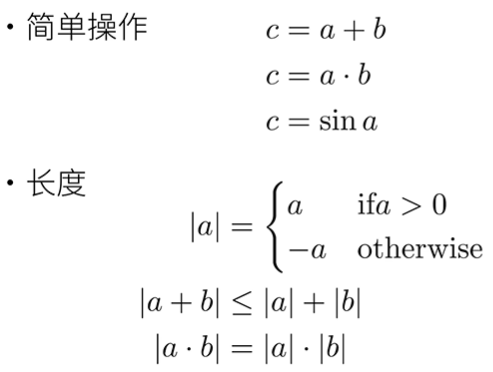 <br/>

## 向量

[**向量可以被视为标量值组成的列表**]<br />
标量值称为向量的*元素*（element）或*分量*（component）<br />
向量通常记为粗体、小写的符号（例如，$\mathbf{x}$、$\mathbf{y}$和$\mathbf{z})$）<br />
人们通过一维张量表示向量;一般来说，张量可以具有任意长度，取决于机器的内存限制<br />
在数学中，向量$\mathbf{x}$可以写为：

$$\mathbf{x} =\begin{bmatrix}x_{1}  \\x_{2}  \\ \vdots  \\x_{n}\end{bmatrix},x_1,\ldots,x_n是向量中的元素$$
而在代码中,写成行向量<br />

在数学表示法中，向量通常记为粗体、小写的符号（例如，$\mathbf{x}$、$\mathbf{y}$和$\mathbf{z})$）,当我们想说一个向量$\mathbf{x}$由$n$个实值标量组成,可以将其表示为$\mathbf{x}\in\mathbb{R}^n$。
(向量的长度通常称为向量的*维度*)


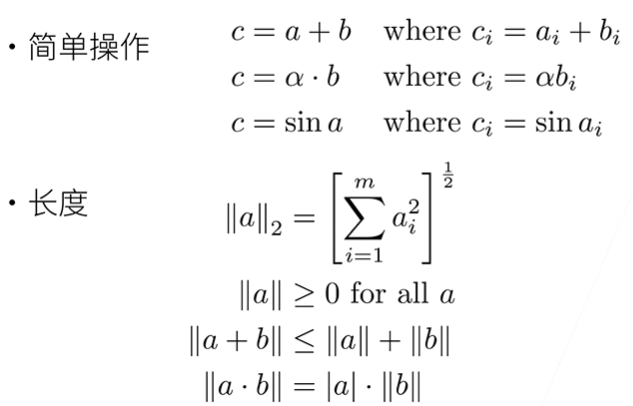

## 矩阵
 矩阵，我们通常用粗体、大写字母来表示
（例如，$\mathbf{X}$、$\mathbf{Y}$和$\mathbf{Z}$），
在代码中表示为具有两个轴的张量。

在数学表示法中,使用$\mathbf{A} \in \mathbb{R}^{m \times n}$
来表示矩阵$\mathbf{A}$，其由$m$行和$n$列的实值标量组成。
我们可以将任意矩阵$\mathbf{A} \in \mathbb{R}^{m \times n}$视为一个表格

$$\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix},其中每个元素a_{ij}属于第i行第j列$$

对于任意$\mathbf{A} \in \mathbb{R}^{m \times n}$，
$\mathbf{A}$的形状是（$m$,$n$）或$m \times n$。
当矩阵的行数和列数相同,称为*方阵*（square matrix）


### 矩阵乘法的直观表示
矩阵实际上是线性变换(旋转、缩放、剪切等操作,都是线性的)<br />
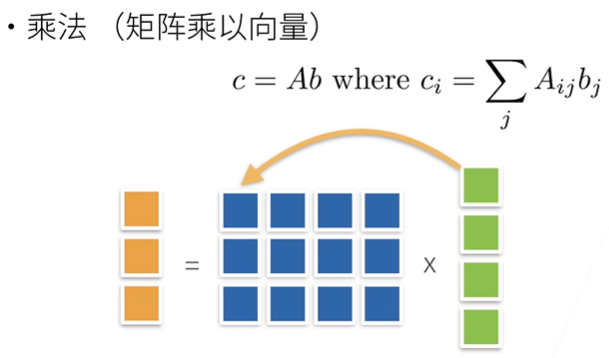 <br />
实际上,当向量与矩阵相乘时,向量会矩阵定义的线性变换(即矩阵)所影响，从而被映射到新的空间中<br />
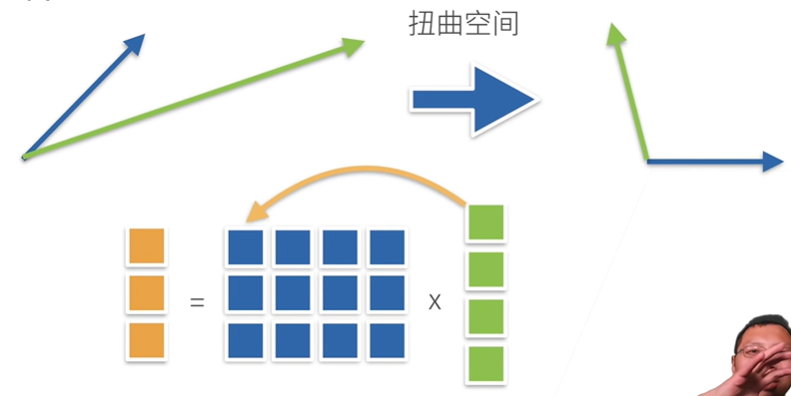<br />

# BASIC Knowledge

## 矩阵的转置$  \mathbf{A}^\top$

In [30]:
A = torch.arange(20).reshape(5,4) # 利用arange创建一个5*4的矩阵
B = A.clone() #通过分配新内存,将A的一个副本分配给B

A, A.T # 矩阵的转置

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([[ 0,  4,  8, 12, 16],
         [ 1,  5,  9, 13, 17],
         [ 2,  6, 10, 14, 18],
         [ 3,  7, 11, 15, 19]]))

## 哈达玛积又称‘元素级乘积’,数学符号$\odot$


$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
    a_{11}  b_{11} & a_{12}  b_{12} & \dots  & a_{1n}  b_{1n} \\
    a_{21}  b_{21} & a_{22}  b_{22} & \dots  & a_{2n}  b_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1}  b_{m1} & a_{m2}  b_{m2} & \dots  & a_{mn}  b_{mn}
\end{bmatrix}.
$$
指两个形状相同的矩阵或张量在对应位置上的元素相乘,得到一个新的矩阵或张量<br/>
不同于矩阵乘法!!!

In [31]:
A*B

tensor([[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121],
        [144, 169, 196, 225],
        [256, 289, 324, 361]])

## 对张量中的任意维度/轴进行求和(降维操作)


在数学表示法中,$\sum$符号表示求和<br />
为了表示长度为$d$的向量所有元素之和，记为$\sum_{i=1}^dx_i$<br />


torch.sum()函数对张量的某个轴（维度）进行求和汇总。<br />
允许你指定要沿哪个轴进行求和，从而得到一个维度更小的张量。<br />


In [37]:
A = torch.arange(24).reshape(2,3,4)
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

**任意形状的张量,其所有元素之和**<br />
二维矩阵$\mathbf{A}$中所有元素之和,记为$\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$

In [38]:
A.sum() #不指定dim,默认张量中的所有元素进行求和; 相当于A.sum(dim=[0,1,2])

tensor(276)

In [39]:
#dim指代的是按那个维度进行操作   三维中,0是高,1是列,2是行
A.sum(dim=0), A.sum(dim=1), A.sum(dim=2)

(tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]),
 tensor([[12, 15, 18, 21],
         [48, 51, 54, 57]]),
 tensor([[ 6, 22, 38],
         [54, 70, 86]]))

In [41]:
#也可以多个维度进行求和
A.sum(dim=[0,1]) # 先高再列

tensor([60, 66, 72, 78])

## 点积Dot(内积),结果是一个标量


给定两个长度为d的向量$\mathbf{x},\mathbf{y}\in\mathbb{R}^d$，
它们的*点积* $\mathbf{x}^\top\mathbf{y}$（或$\langle\mathbf{x},\mathbf{y}\rangle$）相同位置下的元素,进行元素乘积,然后求和<br />
$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$。

In [44]:
# 创建两个一维张量
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
torch.dot(a, b) # 1*4 + 2*5 + 3*6 = 32

tensor(32)

## 矩阵 - 向量积matrix-vector product

矩阵$\mathbf{A} \in \mathbb{R}^{m \times n}$和向量$\mathbf{x} \in \mathbb{R}^n$。
令矩阵$\mathbf{A}$用行向量表示：

$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}, 其中每个\mathbf{a}^\top_{i} \in \mathbb{R}^n都是行向量，表示矩阵的第i行$$


[**矩阵-向量积$\mathbf{A}\mathbf{x}$是一个长度为$m$的列向量，
其第$i$个元素是点积$\mathbf{a}^\top_i \mathbf{x}$**]：

$$
\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.
$$

我们可以把一个矩阵$\mathbf{A} \in \mathbb{R}^{m \times n}$乘法看作一个从$\mathbb{R}^{n}$到$\mathbb{R}^{m}$向量的转换


In [47]:
A = torch.arange(20).reshape(5,4)
x = torch.arange(4)
torch.mv(A, x) # 用torch.mv函数进行矩阵-向量积

tensor([ 14,  38,  62,  86, 110])

## 矩阵-矩阵乘法

设两个矩阵$\mathbf{A} \in \mathbb{R}^{n \times k}$和$\mathbf{B} \in \mathbb{R}^{k \times m}$：

$$\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.$$

用行向量$\mathbf{a}^\top_{i} \in \mathbb{R}^k$表示矩阵$\mathbf{A}$的第$i$行，并让列向量$\mathbf{b}_{j} \in \mathbb{R}^k$作为矩阵$\mathbf{B}$的第$j$列

即 $$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.
$$
将每个元素$c_{ij}$计算为点积$\mathbf{a}^\top_i \mathbf{b}_j$
生成矩阵积$\mathbf{C} = \mathbf{A}\mathbf{B}$ :

$$\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.
$$

In [54]:
A = torch.arange(20).reshape(5,4)
B = torch.arange(12).reshape(4, 3)
#矩阵乘矩阵是 torch.mm()
torch.mm(A, B) #注意顺序   AB≠BA

tensor([[ 42,  48,  54],
        [114, 136, 158],
        [186, 224, 262],
        [258, 312, 366],
        [330, 400, 470]])

## 范数

范数norm是线代中最有用之一的运算符. <br />
向量的范数是表示一个向量的大小(更具体为分量的大小) <br />
在线代中，**向量范数** 是将向量映射到标量的函数$f$ <br />
给定任意向量$\mathbf{x}$，向量范数要满足一些属性(即定义)<br />
第一个是齐次性:<br />
$$f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}),其中\alpha是常数$$
第二个是三角不等式:<br />
$$f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).$$
第三个是非负性:<br />
$$f(\mathbf{x}) \geq 0.$$
任何东西的最小的*大小*是0 <br />
最后一个性质要求范数最小为0，当且仅当向量全由0组成 <br />
$$\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.$$

### 欧几里得距离,又称$L_2$范数

假设$n$维向量$\mathbf{x}$中的元素是$x_1,\ldots,x_n$，其$L_2$ *范数* 就是向量元素平方和的平方根

**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$**
在$L_2$范数中常常省略下标$2$，也就是说$\|\mathbf{x}\|$等同于$\|\mathbf{x}\|_2$

In [57]:
u = torch.tensor([3.0, -4.0])
torch.norm(u) # 欧几里得距离, torch.norm()

tensor(5.)

### $L_1$范数

它表示为向量元素的绝对值之和
**$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$**
与$L_2$范数相比，$L_1$范数受异常值的影响较小

In [59]:
torch.abs(u).sum() # 取绝对值再相加

tensor(7.)

### $P$范数

$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$
其中,$L_2$范数和$L_1$范数是$P$范数的特例

### $F$范数(Frobenius norm)

这里是针对矩阵而言的范数<br />
$\mathbf{X} \in \mathbb{R}^{m \times n}$,即**矩阵**${X}$的$F$范数为
**$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$**
又记为矩阵的2范数, 非向量的2范数

In [62]:
torch.norm(torch.ones((4,9)))

tensor(6.)